In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
#데이터 불러오기
cancer = load_breast_cancer(as_frame=True)

In [3]:
type(cancer)

sklearn.utils.Bunch

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#feature
cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [6]:
# VotingClassifier 실습
lr_clf =LogisticRegression(solver='lbfgs', max_iter=2000)
knn_clf=KNeighborsClassifier()
dt_clf=DecisionTreeClassifier(max_depth=2)
dt_clf2=DecisionTreeClassifier(max_depth=3)
dt_clf3=DecisionTreeClassifier(max_depth=4)

#하드보팅
vo_clf =  VotingClassifier([('LR',lr_clf),
                            ('KNN',knn_clf),
                            ('DT(max_depth=2)',dt_clf),
                            ('DT(max_depth=3)',dt_clf2),
                            ('DT(max_depth=4)',dt_clf3)])

#소프트보팅
vo_clf2 =  VotingClassifier([('LR',lr_clf),
                            ('KNN',knn_clf),
                            ('DT(max_depth=2)',dt_clf),
                            ('DT(max_depth=3)',dt_clf2),
                            ('DT(max_depth=4)',dt_clf3)], voting='soft')

In [7]:
# 학습용/테스트용 데이터 분리
x_train, x_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=100)

In [8]:
#학습
vo_clf.fit(x_train, y_train)
vo_clf2.fit(x_train, y_train)

C:\Users\jinhee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jinhee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=2000)),
                             ('KNN', KNeighborsClassifier()),
                             ('DT(max_depth=2)',
                              DecisionTreeClassifier(max_depth=2)),
                             ('DT(max_depth=3)',
                              DecisionTreeClassifier(max_depth=3)),
                             ('DT(max_depth=4)',
                              DecisionTreeClassifier(max_depth=4))],
                 voting='soft')

In [9]:
#평가 
vo_clf.predict(x_test)
vo_clf.score(x_test, y_test)

0.9532163742690059

In [10]:
#평가 
vo_clf2.predict(x_test)
vo_clf2.predict_proba(x_test)
vo_clf2.score(x_test, y_test)


0.9532163742690059

In [11]:
#개별 모델의 정확도 확인 1
for clf in vo_clf.estimators_:
    print(clf.__class__.__name__, clf.score(x_test, y_test))
    
#개별 모델의 정확도 확인 2
for name,clf in vo_clf.named_estimators_.items():
    print(name, ':',clf.score(x_test, y_test))

LogisticRegression 0.9532163742690059
KNeighborsClassifier 0.9415204678362573
DecisionTreeClassifier 0.9415204678362573
DecisionTreeClassifier 0.9473684210526315
DecisionTreeClassifier 0.9473684210526315
LR : 0.9532163742690059
KNN : 0.9415204678362573
DT(max_depth=2) : 0.9415204678362573
DT(max_depth=3) : 0.9473684210526315
DT(max_depth=4) : 0.9473684210526315


# RandomForest 실습

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.9590643274853801

In [14]:
# GridSearchCV로 하이퍼파라미터 최적화
from sklearn.model_selection import GridSearchCV


prams={
    'n_estimators' : [100,300,500],
    'max_depth' : [3,5,7],
    'n_jobs' : [-1]
}
grid_rf = GridSearchCV(rf_clf, param_grid=prams, cv=5, n_jobs=-1)
grid_rf.fit(x_train, y_train)
grid_rf.score(x_test, y_test)

0.9532163742690059

In [15]:
grid_rf.best_params_

{'max_depth': 7, 'n_estimators': 100, 'n_jobs': -1}

In [16]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=7, n_jobs=-1)

In [17]:
feature_importance=pd.DataFrame(grid_rf.best_estimator_.feature_importances_, index=cancer.feature_names)

<AxesSubplot:>

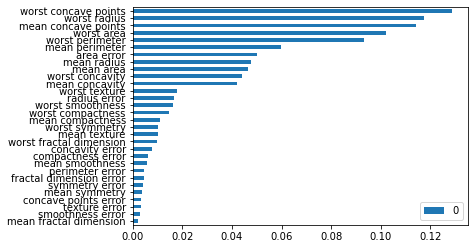

In [18]:
feature_importance.sort_values(by=0).plot(kind='barh')

# AdaBoost 와 GBM 실습

In [28]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [37]:
# Adaboost, GBM 객체 생성

ada=AdaBoostClassifier()
gbm=GradientBoostingClassifier()


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [38]:
#하이퍼파라미터 최적화
ada_params ={
    'n_estimators ': [100,200],
    'learning_rate' : [0.1,0.5,1]
}
grid_ada = GridSearchCV(ada, ada_params, cv=5)
grid_ada.score(x_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [27]:
grid_ada.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [33]:
gbm_params ={
    'n_estimators ': [100,200],
    'learning_rate' : [0.1,0.5,1],
    'max_depth' : [3,5]
}
grid_gbm = GridSearchCV(gbm, gbm_params, cv=5)
grid_gbm.score(x_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# XGBoost 실습

In [ ]:
#!conda install -c anaconda py-xgboost
!conda install xgboost

In [ ]:
import xgboost

In [ ]:
xgboost.__version__